In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
passengers_by_time = pd.read_excel("data-files/subway-stats.xls", "지하철 시간대별 이용현황")

In [126]:
passengers_by_time.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2023-11,1호선,150.0,서울역,754,24,"8,803","9,140","13,291","57,495",...,"13,604","2,582","2,715",0,263,0,0,0,0,2023-12-03 09:30:45
2,2023-11,1호선,151.0,시청,85,1,"2,386","4,880","4,126","25,406",...,"4,157",392,989,5,24,0,1,0,0,2023-12-03 09:30:45
3,2023-11,1호선,152.0,종각,146,2,"3,933","5,534","4,289","28,364",...,"4,347","1,067",928,0,3,0,0,0,0,2023-12-03 09:30:45
4,2023-11,1호선,153.0,종로3가,158,5,"3,832","2,823","3,672","12,311",...,"4,714","1,293","1,967",1,49,0,0,0,0,2023-12-03 09:30:45


In [127]:
passengers_by_time2 = pd.read_excel("data-files/subway-stats.xls", "지하철 시간대별 이용현황")
print( passengers_by_time2.columns, len(passengers_by_time2.columns) )
# passengers_by_time2.columns = np.arange(1, 54) # 전체 컬럼명 변경
passengers_by_time2.rename(columns={'Unnamed: 5': '04_하차', 'Unnamed: 7': '05_하차'}, inplace=True) # 부분 컬럼명 변경
print( passengers_by_time2.columns, len(passengers_by_time2.columns) )

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [128]:
# print( passengers_by_time2.columns[4], passengers_by_time2.columns[5] )
# np.arange(4, 4 + 24).size
new_colunms = []
for t in np.arange(4, 4 + 24):
    t2 = t % 24
    new_colunms.append(f'{t2:02}_in')   # {t2:02} : t2를 두로 만들되 1자리가 없으면 0으로 채우기
    new_colunms.append(f'{t2:02}_out')
# print(new_colunms[:6])

rename_pattern = {}
for prev_c, new_c in zip(passengers_by_time2.columns[4:-1], new_colunms):
    rename_pattern.update({prev_c:new_c}) # 딕셔너리에 없으면 추가 있으면 변경
print(rename_pattern)

rename_pattern2 = \
    { prev_c:new_c for prev_c, new_c in zip(passengers_by_time2.columns[4:-1], 
                                            new_colunms) }
rename_pattern2

a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a_squared = [ n**2 for n in a ]
a_squared



    

{'04:00:00~04:59:59': '04_in', '04_하차': '04_out', '05:00:00~05:59:59': '05_in', '05_하차': '05_out', '06:00:00~06:59:59': '06_in', 'Unnamed: 9': '06_out', '07:00:00~07:59:59': '07_in', 'Unnamed: 11': '07_out', '08:00:00~08:59:59': '08_in', 'Unnamed: 13': '08_out', '09:00:00~09:59:59': '09_in', 'Unnamed: 15': '09_out', '10:00:00~10:59:59': '10_in', 'Unnamed: 17': '10_out', '11:00:00~11:59:59': '11_in', 'Unnamed: 19': '11_out', '12:00:00~12:59:59': '12_in', 'Unnamed: 21': '12_out', '13:00:00~13:59:59': '13_in', 'Unnamed: 23': '13_out', '14:00:00~14:59:59': '14_in', 'Unnamed: 25': '14_out', '15:00:00~15:59:59': '15_in', 'Unnamed: 27': '15_out', '16:00:00~16:59:59': '16_in', 'Unnamed: 29': '16_out', '17:00:00~17:59:59': '17_in', 'Unnamed: 31': '17_out', '18:00:00~18:59:59': '18_in', 'Unnamed: 33': '18_out', '19:00:00~19:59:59': '19_in', 'Unnamed: 35': '19_out', '20:00:00~20:59:59': '20_in', 'Unnamed: 37': '20_out', '21:00:00~21:59:59': '21_in', 'Unnamed: 39': '21_out', '22:00:00~22:59:59': '

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [129]:
passengers_by_time = pd.read_excel("data-files/subway-stats.xls", "지하철 시간대별 이용현황")

In [130]:
new_colunms = []
for t in np.arange(4, 4 + 24):
    t2 = t % 24
    new_colunms.append(f'{t2:02}_in')
    new_colunms.append(f'{t2:02}_out')

rename_pattern = \
    { prev_c:new_c for prev_c, new_c 
                   in zip(passengers_by_time.columns[4:-1], new_colunms) }

passengers_by_time.rename(columns=rename_pattern, inplace=True)

passengers_by_time.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04_in', '04_out', '05_in', '05_out',
       '06_in', '06_out', '07_in', '07_out', '08_in', '08_out', '09_in',
       '09_out', '10_in', '10_out', '11_in', '11_out', '12_in', '12_out',
       '13_in', '13_out', '14_in', '14_out', '15_in', '15_out', '16_in',
       '16_out', '17_in', '17_out', '18_in', '18_out', '19_in', '19_out',
       '20_in', '20_out', '21_in', '21_out', '22_in', '22_out', '23_in',
       '23_out', '00_in', '00_out', '01_in', '01_out', '02_in', '02_out',
       '03_in', '03_out', '작업일시'],
      dtype='object')

In [131]:
# 인원과 관련된 컬럼의 데이터를 수치형으로 변경
# 승차인원이 가장 많은 시간, 하차인원이 가장 많은 시간, 승하차인원이 가장 많은 시간 찾기
# 전체 승차인원이 가장 많은 역, 하차인원이 가장 많은 역, 승하차인원이 가장 많은 역
# 각 시간대별 승차인원이 가장 많은 역, 하차인원이 가장 많은 역, 승하차인원이 가장 많은 역 찾기
# 각 시간의 승하차 인원 선그래프로 표시

In [132]:
# 1행 제거 (불필요한 행)
passengers_by_time2 = passengers_by_time.iloc[1:, :]
passengers_by_time2 = passengers_by_time.drop(0, axis='index') # 행삭제

# 인원과 관련된 컬럼의 데이터를 수치형으로 변경 1
# for idx in np.arange(4, 4 + 24):
#     idx2 = idx % 24
#     # print(f"{idx2:02}")
#     for s in ["_in", "_out"]:
#         passengers_by_time2[f"{idx2:02}{s}"] = passengers_by_time2[f"{idx2:02}{s}"].map(lambda v: int(v.replace(",", "")))

# 인원과 관련된 컬럼의 데이터를 수치형으로 변경 2
for col in passengers_by_time2.columns[4:-1]:
    passengers_by_time2[col] = \
        passengers_by_time2[col].map(lambda v: int(v.replace(",", "")))
    
# 1행을 지웠기 때문에 인덱스 번호 재구성 (선택적)
passengers_by_time2.reset_index(drop=True, inplace=True)

In [133]:
# 승하차인원 데이터프레임 만들기
in_cols = passengers_by_time2.columns[4:-1:2]
out_cols = passengers_by_time2.columns[5:-1:2]
# in_out_df = passengers_by_time2[passengers_by_time2.columns[:4]] #앞의 4개의 컬럼만 뽑기
in_out_df = passengers_by_time2[passengers_by_time2.columns[:4]].copy(deep=True)
for in_col, out_col in zip(in_cols, out_cols):
    hap = passengers_by_time2[in_col] + passengers_by_time2[out_col]
    in_out_df[f"{in_col[:2]}_inout"] = hap

In [134]:
in_out_df

,사용월,호선명,역ID,지하철역,04_inout,05_inout,06_inout,07_inout,08_inout,09_inout,...,18_inout,19_inout,20_inout,21_inout,22_inout,23_inout,00_inout,01_inout,02_inout,03_inout
0,2023-11,1호선,150.0,서울역,778,17943,70786,160541,318073,244174,...,339141,195112,137623,131939,85706,41862,5297,263,0,0
1,2023-11,1호선,151.0,시청,86,7266,29532,82754,215527,119380,...,202623,82467,70718,63988,40544,15172,1381,29,1,0
2,2023-11,1호선,152.0,종각,148,9467,32653,119414,291725,178805,...,285190,124086,96781,98552,71736,31668,1995,3,0,0
3,2023-11,1호선,153.0,종로3가,163,6655,15983,32632,78980,79642,...,140672,78914,58190,58920,45539,20740,3260,50,0,0
4,2023-11,1호선,154.0,종로5가,38,6137,20140,49298,112942,84464,...,137603,72527,47776,41491,26455,10053,1217,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2023-11,신림선,4407.0,당곡,0,2140,5426,17514,27888,18728,...,26665,18169,12148,10074,8510,4802,1552,2,0,0
613,2023-11,신림선,4408.0,신림,1,1386,1962,5830,9832,7178,...,14157,8870,5711,4919,4192,2790,1093,3,0,0
614,2023-11,신림선,4409.0,서원,3,2650,4908,15567,22872,14576,...,15986,13055,8438,7858,7519,5113,1678,2,0,0
615,2023-11,신림선,4410.0,서울대벤처타운,4,6662,13268,37752,56291,35988,...,47893,37499,23811,21467,21134,13270,5865,187,0,0


In [135]:
# 승차인원이 가장 많은 시간, 하차인원이 가장 많은 시간, 승하차인원이 가장 많은 시간 찾기

# 연습 1 : 각 컬럼을 직접 반복하면서 합계 도출
in_columns = passengers_by_time2.columns[4:-1:2] # _in 컬럼명 뽑기

in_col_sums = {}
for in_col in in_columns:
    # print( in_col, ':', passengers_by_time2[in_col].sum() )
    in_col_sums.update({in_col:passengers_by_time2[in_col].sum()})
in_col_sums

# 연습 2 : 데이터프레임의 sum 함수를 사용해서 합계 일괄 도출
numeric_cols = passengers_by_time2.columns[4:-1]
all_col_sums = passengers_by_time2[numeric_cols].sum()
type(all_col_sums)

in_col_sums = all_col_sums.iloc[::2]
out_col_sums = all_col_sums.iloc[1::2]

print(in_col_sums.sort_values(ascending=False)[:3]) # 시간별승차인원합계순위
print(out_col_sums.sort_values(ascending=False)[:3]) # 시간별하차인원합계순위


18_in    21756358
08_in    19617572
17_in    18671543
dtype: int64
08_out    23197311
18_out    21404067
19_out    16003720
dtype: int64


In [136]:
# 전체 승차인원이 가장 많은 역, 하차인원이 가장 많은 역, 승하차인원이 가장 많은 역
in_cols = passengers_by_time2.columns[4:-1:2]
out_cols = passengers_by_time2.columns[5:-1:2]

top_5_in_index = \
    passengers_by_time2[in_cols].sum(axis=1).sort_values(ascending=False)[:5].index
top_5_out_index = \
    passengers_by_time2[out_cols].sum(axis=1).sort_values(ascending=False)[:5].index
top_5_all_index = \
    passengers_by_time2[numeric_cols].sum(axis=1).sort_values(ascending=False)[:10].index

passengers_by_time2.loc[top_5_in_index]
# passengers_by_time2.loc[top_5_out_index]
passengers_by_time2.loc[top_5_all_index]

,사용월,호선명,역ID,지하철역,04_in,04_out,05_in,05_out,06_in,06_out,...,23_out,00_in,00_out,01_in,01_out,02_in,02_out,03_in,03_out,작업일시
25,2023-11,2호선,216.0,잠실(송파구청),97,7,13349,5044,50966,36164,...,44842,4750,9421,26,626,0,0,0,0,2023-12-03 09:30:45
31,2023-11,2호선,222.0,강남,162,7,8112,11207,17751,55474,...,22813,13559,6868,45,357,0,0,0,0,2023-12-03 09:30:45
48,2023-11,2호선,239.0,홍대입구,1035,21,26312,3898,31083,17496,...,47413,12926,16979,42,1430,0,0,0,0,2023-12-03 09:30:45
28,2023-11,2호선,219.0,삼성(무역센터),157,0,4451,5591,6954,45129,...,6603,2502,3215,7,685,0,0,0,0,2023-12-03 09:30:45
41,2023-11,2호선,232.0,구로디지털단지,321,15,39199,5183,54705,19806,...,49144,3535,14058,21,814,0,0,0,0,2023-12-03 09:30:45
0,2023-11,1호선,150.0,서울역,754,24,8803,9140,13291,57495,...,13604,2582,2715,0,263,0,0,0,0,2023-12-03 09:30:45
39,2023-11,2호선,230.0,신림,249,7,38641,3793,70117,16238,...,70902,4239,21957,32,1154,1,1,0,0,2023-12-03 09:30:45
30,2023-11,2호선,221.0,역삼,74,0,3775,6852,9168,43346,...,9849,3579,3415,12,198,0,0,0,0,2023-12-03 09:30:45
29,2023-11,2호선,220.0,선릉,215,4,4722,6593,11402,44462,...,10810,4242,4967,17,278,0,0,0,0,2023-12-03 09:30:45
43,2023-11,2호선,234.0,신도림,3997,21,37516,4728,55738,21106,...,49503,2747,22403,27,2283,0,0,0,0,2023-12-03 09:30:45


In [137]:
passengers_by_time2.loc[1,"지하철역"]

'시청'

In [138]:
# 각 시간대별 승차인원이 가장 많은 역, 하차인원이 가장 많은 역, 승하차인원이 가장 많은 역 찾기 1

top_v_by_time = []
for in_col, out_col in zip(in_cols, out_cols):
    top_v_in = passengers_by_time2[in_col].sort_values(ascending=False).iloc[:1]
    i1, v1 = top_v_in.index, top_v_in.values[0] # 특정 컬럼의 max 행 인덱스와 값 조회
    top_v_out = passengers_by_time2[out_col].sort_values(ascending=False).iloc[:1]
    i2, v2 = top_v_out.index, top_v_out.values[0] # 특정 컬럼의 max 행 인덱스와 값 조회
    top_v_by_time.append((in_col[:2], # 시간
                          passengers_by_time2.loc[i1,"지하철역"].values[0], # 역이름
                          v1,
                          passengers_by_time2.loc[i2,"지하철역"].values[0], # 역이름
                          v2)) # 승차인원
    
top_v_by_time



[('04', '구로', 12663, '영등포', 126),
 ('05', '부천', 39988, '강남', 11207),
 ('06', '신림', 70117, '서울역', 57495),
 ('07', '신림', 193280, '역삼', 155327),
 ('08', '신림', 280940, '가산디지털단지', 404029),
 ('09', '신림', 168962, '역삼', 315780),
 ('10', '신림', 91674, '강남', 158070),
 ('11', '잠실(송파구청)', 84973, '홍대입구', 121454),
 ('12', '서울역', 94257, '홍대입구', 141197),
 ('13', '잠실(송파구청)', 103592, '홍대입구', 156798),
 ('14', '잠실(송파구청)', 114030, '홍대입구', 148569),
 ('15', '강남', 137415, '홍대입구', 152974),
 ('16', '강남', 169207, '홍대입구', 166082),
 ('17', '강남', 254265, '홍대입구', 202164),
 ('18', '삼성(무역센터)', 323059, '잠실(송파구청)', 253681),
 ('19', '강남', 212290, '신림', 198462),
 ('20', '잠실(송파구청)', 176953, '신림', 123472),
 ('21', '홍대입구', 191832, '신림', 117717),
 ('22', '홍대입구', 187126, '신림', 106510),
 ('23', '홍대입구', 94390, '신림', 70902),
 ('00', '강남', 13559, '신도림', 22403),
 ('01', '사당', 48, '신도림', 2283),
 ('02', '노원', 1, '숙대입구(갈월)', 2),
 ('03', '서울역', 0, '서울역', 0)]

In [139]:
passengers_by_time2.iloc[128, :]

사용월                   2023-11
호선명                       경부선
역ID                    1701.0
지하철역                       구로
04_in                   12663
04_out                     36
05_in                   23634
05_out                   4363
06_in                   19066
06_out                  13715
07_in                   40271
07_out                  30949
08_in                   38654
08_out                  74231
09_in                   27689
09_out                  41551
10_in                   21129
10_out                  28039
11_in                   21408
11_out                  23332
12_in                   23461
12_out                  22634
13_in                   24502
13_out                  24331
14_in                   25052
14_out                  23734
15_in                   28442
15_out                  25876
16_in                   35035
16_out                  31130
17_in                   53474
17_out                  40382
18_in                   58094
18_out    

In [140]:
# 각 시간대별 승차인원이 가장 많은 역, 하차인원이 가장 많은 역, 승하차인원이 가장 많은 역 찾기 1

station_by_time = passengers_by_time2[numeric_cols].values # values : dataframe -> ndarray
station_by_time
max_idx = station_by_time.argmax(axis=0) # 가장 큰 값이 있는 곳의 순서 번호
max_values = station_by_time.max(axis=0) # 가장 큰 값
max_v_by_times = []
for col, i, v in zip(numeric_cols, max_idx, max_values):
    max_v_by_times.append((col, 
                           passengers_by_time2.iloc[i, 3], # 역이름읽기 1
                           passengers_by_time2["지하철역"].iloc[i], # 역이름읽기 2
                           v))
max_v_by_times


[('04_in', '구로', '구로', 12663),
 ('04_out', '영등포', '영등포', 126),
 ('05_in', '부천', '부천', 39988),
 ('05_out', '강남', '강남', 11207),
 ('06_in', '신림', '신림', 70117),
 ('06_out', '서울역', '서울역', 57495),
 ('07_in', '신림', '신림', 193280),
 ('07_out', '역삼', '역삼', 155327),
 ('08_in', '신림', '신림', 280940),
 ('08_out', '가산디지털단지', '가산디지털단지', 404029),
 ('09_in', '신림', '신림', 168962),
 ('09_out', '역삼', '역삼', 315780),
 ('10_in', '신림', '신림', 91674),
 ('10_out', '강남', '강남', 158070),
 ('11_in', '잠실(송파구청)', '잠실(송파구청)', 84973),
 ('11_out', '홍대입구', '홍대입구', 121454),
 ('12_in', '서울역', '서울역', 94257),
 ('12_out', '홍대입구', '홍대입구', 141197),
 ('13_in', '잠실(송파구청)', '잠실(송파구청)', 103592),
 ('13_out', '홍대입구', '홍대입구', 156798),
 ('14_in', '잠실(송파구청)', '잠실(송파구청)', 114030),
 ('14_out', '홍대입구', '홍대입구', 148569),
 ('15_in', '강남', '강남', 137415),
 ('15_out', '홍대입구', '홍대입구', 152974),
 ('16_in', '강남', '강남', 169207),
 ('16_out', '홍대입구', '홍대입구', 166082),
 ('17_in', '강남', '강남', 254265),
 ('17_out', '홍대입구', '홍대입구', 202164),
 ('18_in', '삼성(무역센터)'

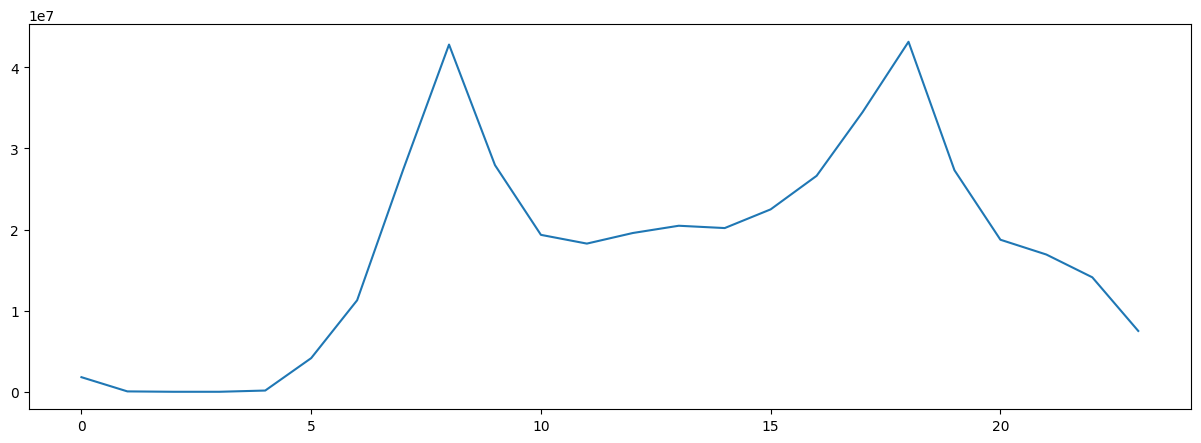

In [152]:
# 각 시간의 승하차 인원 선그래프로 표시

passengers = in_out_df.iloc[:, 4:].sum().values
passengers2 = list(passengers[-4:]) + list(passengers[:-4])

plt.figure(figsize=(15, 5))
plt.plot(passengers2)
plt.show()

In [ ]:
passengers[-4:] (passengers[:-4])